HW7: Visualizing Hidden Layers
==============================

Calvin Henggeler
Original Code: 2023_11_17.ipynb
Dataset: keras mnist


In [3]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from PIL import Image
from io import BytesIO as sio
import IPython.display as ipd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# load the figures
(x_tr, y_tr), (x_te, y_te) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
# display a figure
f = sio()
Image.fromarray(np.uint8(255-x_tr[0])).save(f, 'png')
ipd.display(ipd.Image(data=f.getvalue()))

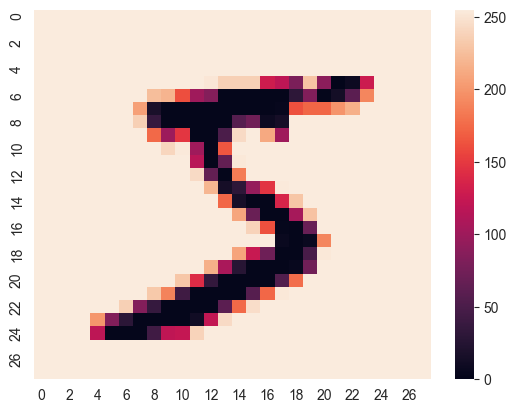

In [6]:
# we can also just use a heatmap
sns.heatmap(255-x_tr[0]);

In [7]:
x_tr.shape

(60000, 28, 28)

In [8]:
# the inputs are given in 2d arrays, and we need them to be 1d arrays
x_tr_2d = [x.reshape(-1,) for x in x_tr]
x_te_2d = [x.reshape(-1,) for x in x_te]

In [9]:
# fit a MLP - it will take a couple minutes
nn = MLPClassifier()
nn.fit(x_tr_2d,y_tr)

MLPClassifier()

In [10]:
nn.score(x_te_2d,y_te)

0.9621

Let's visualize activation patterns for the first hidden layer. To do this, we give 784 inputs to the network and measure the value of a node in the hidden layer each time. The first input we give is 255 followed by all 0s, which shows the activation level for the first bit. Then 0, 255, and the rest 0s, and so on.

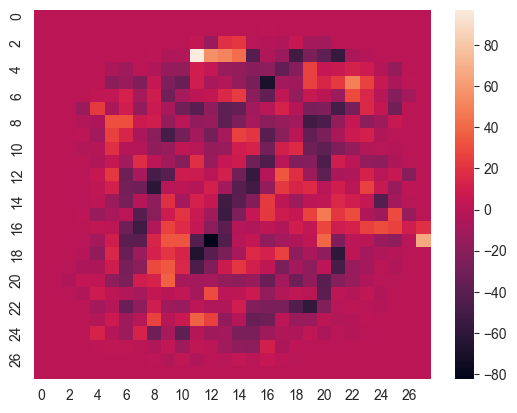

In [11]:
k = 2 # which hidden layer node to visualize
res = []
for i in range(784):
    inp = np.zeros(784)
    inp[i]=255
    res.append(np.matmul(inp,nn.coefs_[0][:,k]))
sns.heatmap(pd.DataFrame(np.array(res).reshape(28,28)));

We can plot a bunch at once.

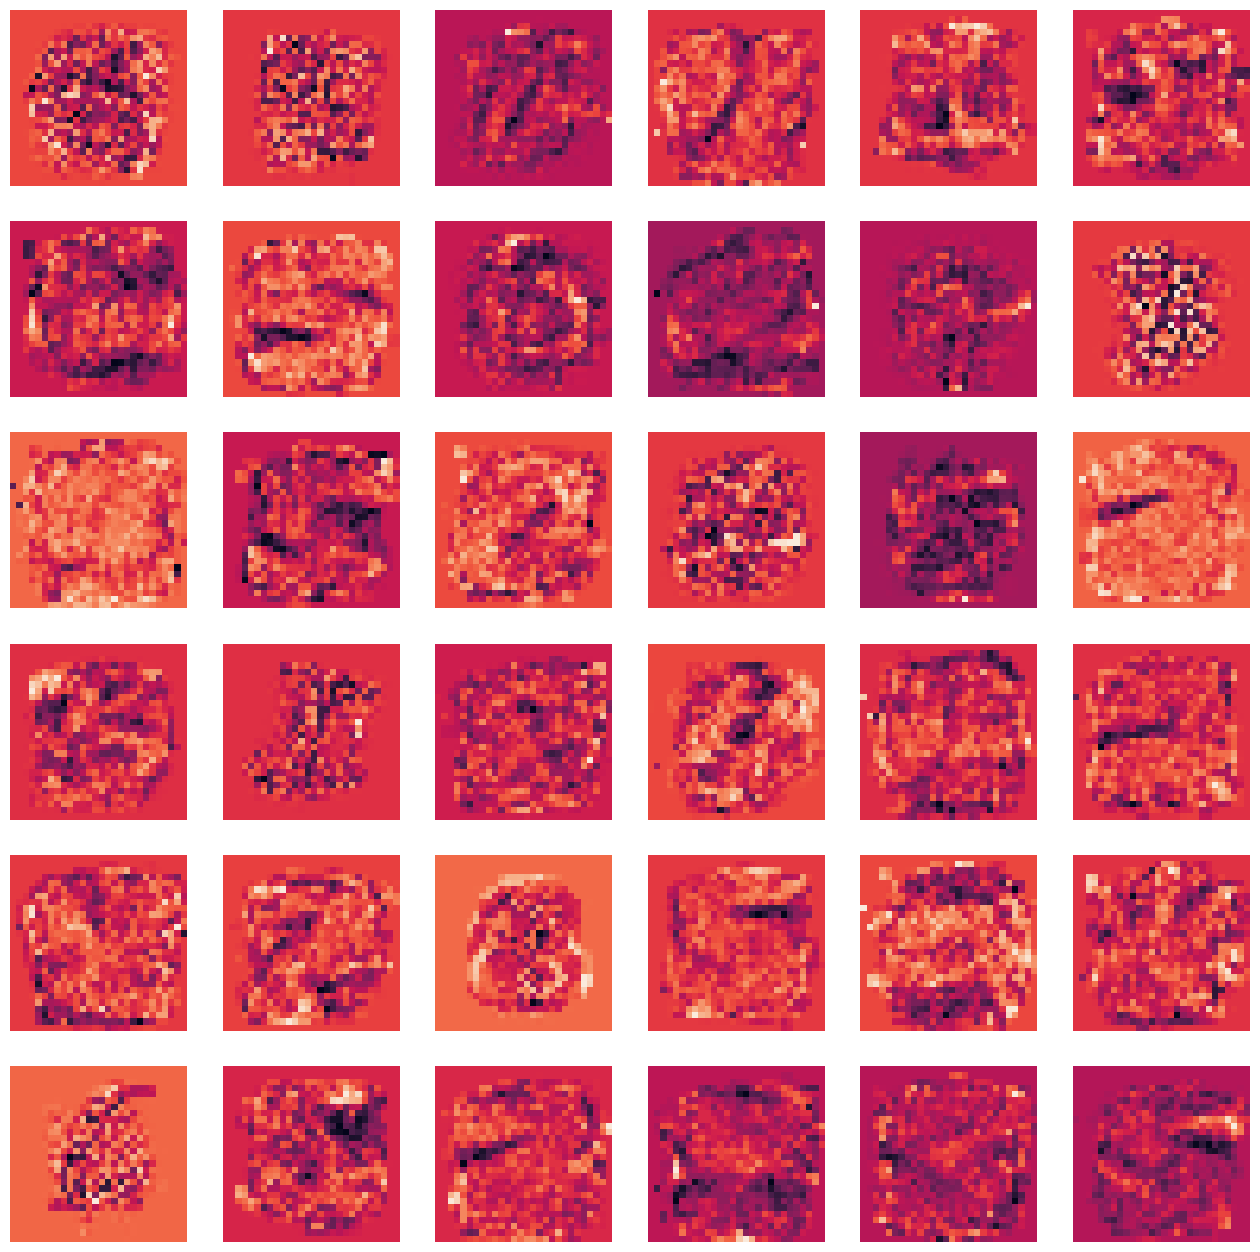

In [12]:
fig,axes = plt.subplots(6,6,figsize = (16,16))
for idx in range(36):
    res = []
    for i in range(784):
        inp = np.zeros(784)
        inp[i]=255
        res.append(np.matmul(inp,nn.coefs_[0][:,idx]))
    sns.heatmap(pd.DataFrame(np.array(res).reshape(28,28)),ax=axes[idx//6,idx%6],cbar = False)
plt.setp(axes, xticks=[], yticks=[]);

How to control the number of layers and the number of neurons per layer. We'll do two hidden layers with 16 neurons each.

In [13]:
nn2 = MLPClassifier(hidden_layer_sizes = (16,16))
nn2.fit(x_tr_2d,y_tr)

C:\repos\DS312\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(16, 16))

In [14]:
nn2.score(x_te_2d,y_te)

0.9342

We can review the test samples which were mislabelled by the model.

index: 8
predicted: 6


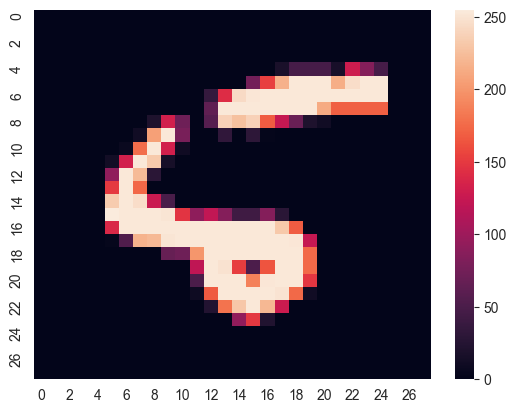

index: 33
predicted: 6


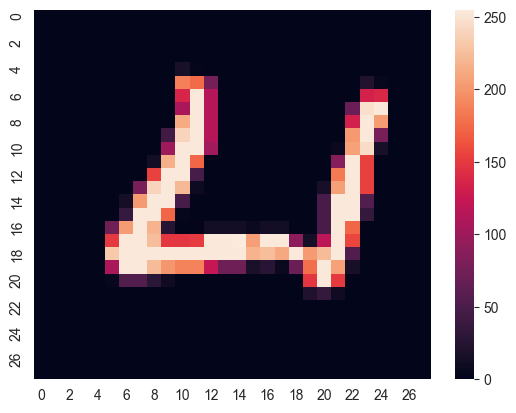

index: 38
predicted: 3


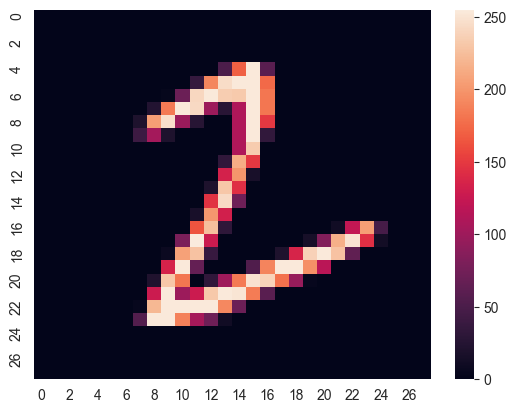

index: 63
predicted: 6


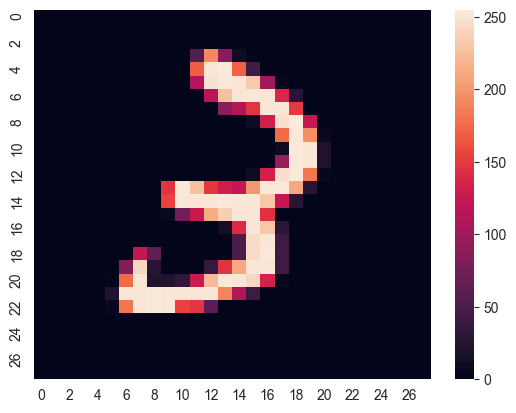

index: 124
predicted: 4


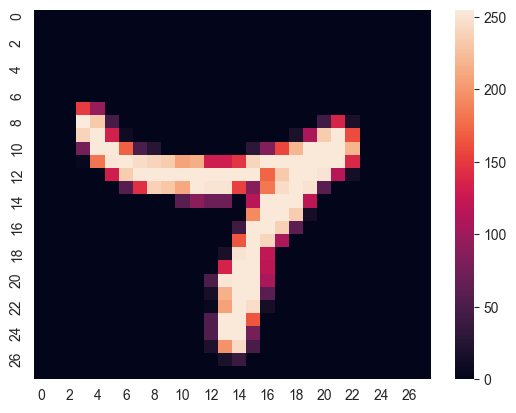

index: 149
predicted: 4


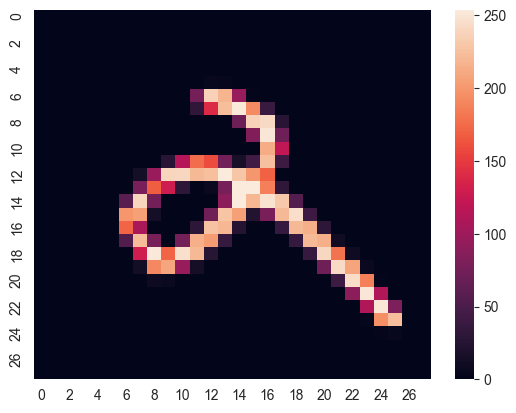

index: 151
predicted: 8


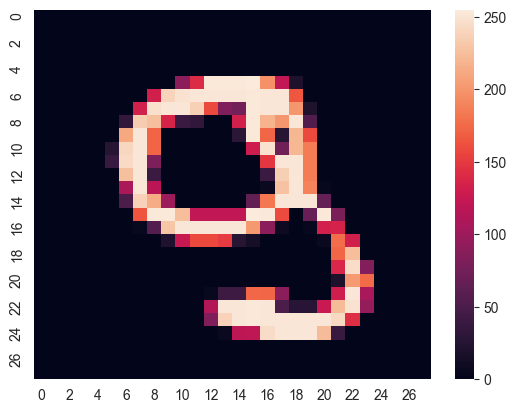

index: 195
predicted: 5


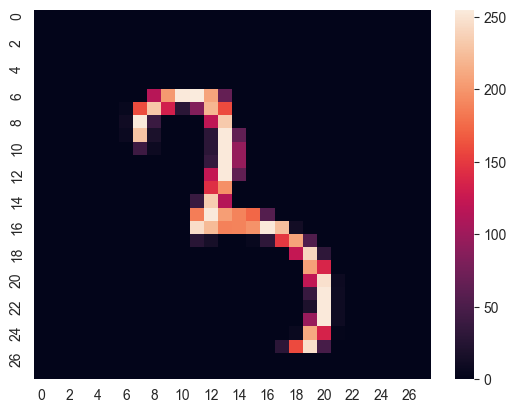

index: 233
predicted: 7


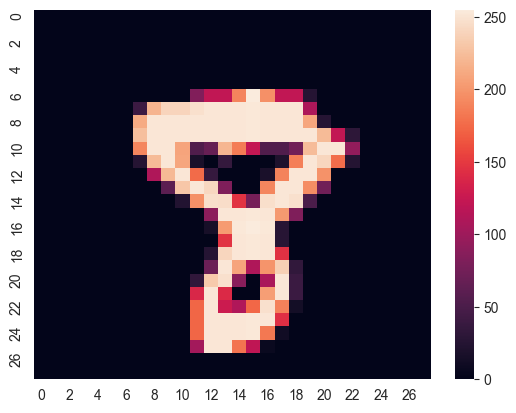

index: 247
predicted: 6


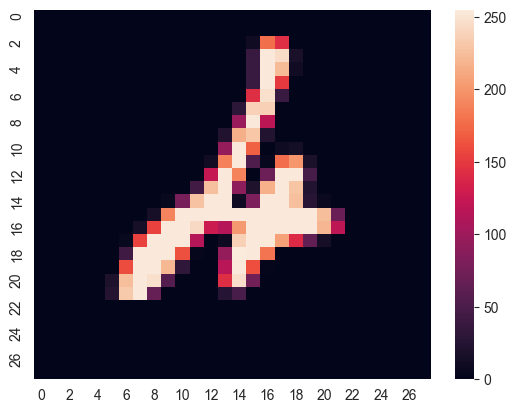

index: 259
predicted: 0


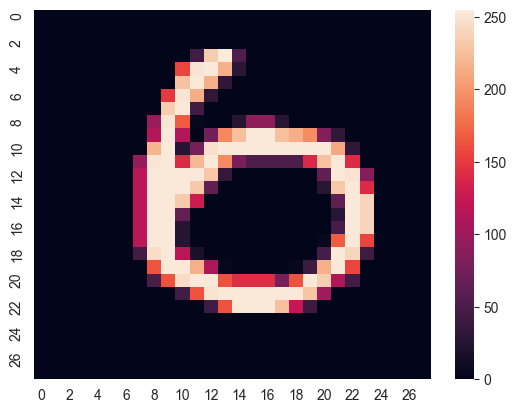

index: 274
predicted: 8


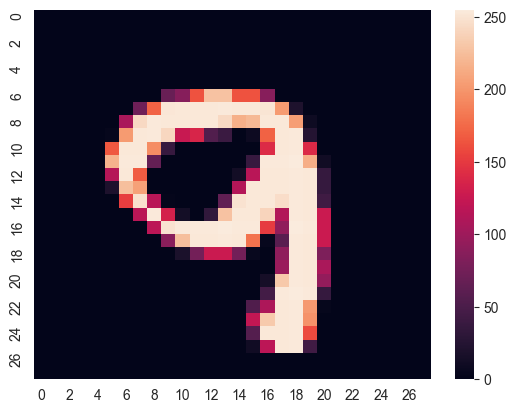

In [15]:
preds = nn2.predict(x_te_2d)
wrongs = iter(np.where(y_te != preds)[0])
inpt = ''
while inpt != 'q':
    idx = next(wrongs)
    inpt = input('q to quit')
    print(f'index: {idx}\npredicted: {nn2.predict([x_te_2d[idx]])[0]}')
    sns.heatmap(x_te[idx])
    plt.show();

Let's plot the activation patterns of the first hidden layer.

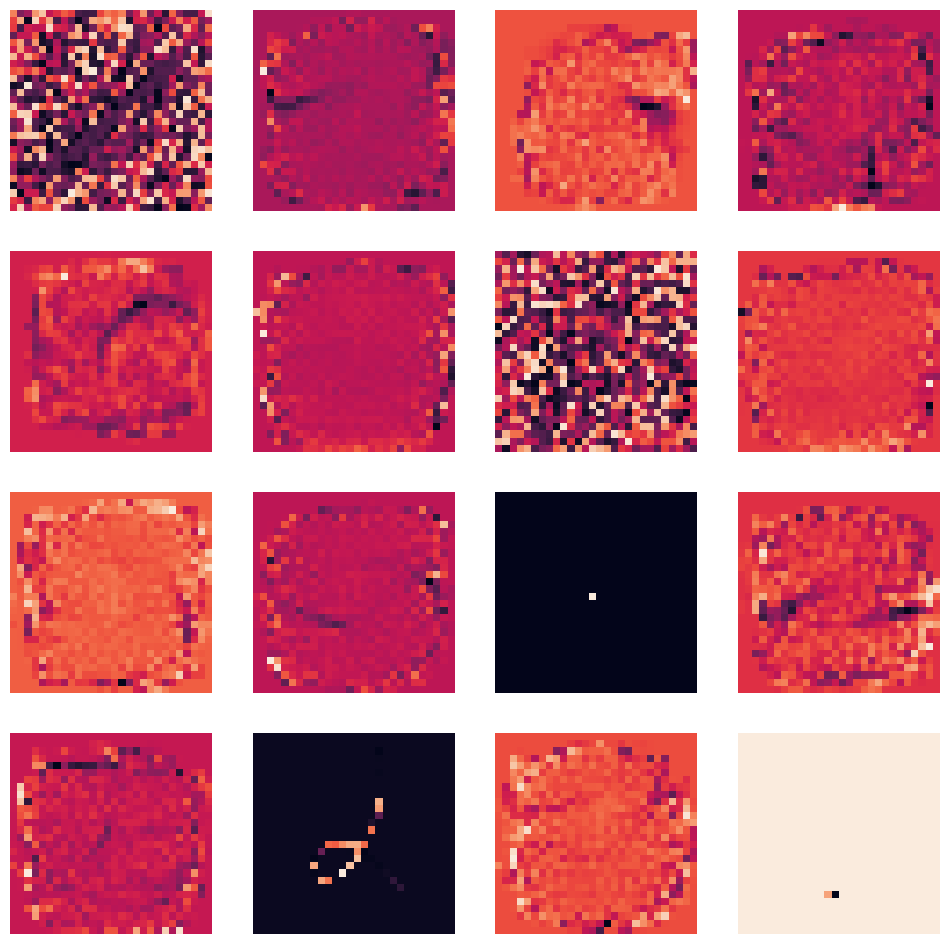

In [16]:
fig,axes = plt.subplots(4,4,figsize = (12,12))
for idx in range(16):
    res = []
    for i in range(784):
        inp = np.zeros(784)
        inp[i]=255
        res.append(np.matmul(inp,nn2.coefs_[0][:,idx]))
    sns.heatmap(pd.DataFrame(np.array(res).reshape(28,28)),ax=axes[idx//4,idx%4],cbar = False)
plt.setp(axes, xticks=[], yticks=[]);

In [29]:
nn2.coefs_[0]   # weights form input layer to first hidden layer

array([[ 2.35222280e-315,  8.35134759e-316,  7.77564920e-316, ...,
         6.50905930e-316, -5.55076350e-316, -2.88724770e-316],
       [-1.79966579e-315, -2.25304866e-315, -1.82273317e-317, ...,
        -2.24569365e-315, -4.71835347e-315,  1.45054949e-315],
       [-9.73503782e-316, -6.41127922e-316,  1.06029389e-315, ...,
        -3.38221524e-315,  2.57896300e-315, -5.73131959e-316],
       ...,
       [ 5.58457859e-316,  7.18130513e-316, -3.59477604e-315, ...,
        -2.11083695e-315,  3.47065240e-315, -1.42025982e-315],
       [-9.77860334e-316,  4.91345123e-316, -2.46090709e-316, ...,
        -3.35708977e-315, -1.28567244e-315,  7.57816380e-316],
       [ 2.58145090e-315, -2.57036841e-315,  1.26724118e-315, ...,
        -2.34062881e-315, -1.59228808e-315,  1.11485422e-315]])

In [30]:
nn2.coefs_[1]   # weights form hidden layer 1 to layer 2

array([[ 2.40831372e-315,  3.59763450e-315, -9.05792189e-317,
        -1.90381387e-315, -4.00801911e-316, -1.00377973e-316,
         3.43221777e-316, -4.68579329e-316, -2.47310142e-315,
        -1.45258694e-316,  1.28481746e-316, -4.17272400e-316,
        -7.88050822e-316, -1.77431675e-315,  9.71661025e-316,
        -2.41906146e-316],
       [-2.29415621e-002, -6.15074518e-002, -1.11635706e-001,
         9.52113931e-003, -1.20674445e-001, -1.02908388e-003,
        -1.23705838e-001, -2.33282638e-002, -3.12533823e-002,
        -1.44140137e-002,  1.58669979e-001,  8.65249803e-004,
         7.49805780e-004, -9.14772688e-002, -1.12758107e-001,
         8.79700454e-002],
       [ 2.76853767e-001,  1.92266105e-002, -4.24625942e-001,
        -1.47725833e-002, -7.33345496e-002, -1.88106241e-001,
         4.64097552e-001,  1.59634903e-003, -1.27848454e-002,
        -1.28339690e-002, -4.04133840e-001, -9.20987586e-002,
        -5.59922191e-002, -2.81701071e-002,  4.84985973e-002,
        -1.01894

In [31]:
nn2.coefs_[2]   # Weights from Hidden layer 2 to output layer

array([[-2.29243340e-02,  1.68220297e-02,  1.13060418e-01,
         1.51199849e-01,  1.06637075e-02,  1.73693954e-01,
        -1.98932765e-02, -3.16815659e-02,  7.05207704e-02,
         1.61028013e-02],
       [ 2.84016358e-01, -6.86724167e-02,  1.22364926e-01,
         1.68398828e-01, -1.28169068e-01, -1.56169810e-01,
         3.26889455e-02,  6.31872738e-02, -4.34872004e-04,
        -6.30812624e-02],
       [ 2.01710775e-01,  6.63526852e-02,  1.03977532e-01,
         1.43300089e-01,  1.59460879e-01,  7.44775548e-02,
         9.76655979e-02,  3.13132949e-02, -3.86092181e-02,
         1.80874016e-01],
       [ 7.75637390e-02,  1.91297402e-01,  1.16253316e-01,
         2.33230307e-01,  1.51051100e-01,  2.20859921e-02,
         9.57179136e-02,  1.56371771e-01,  2.78282168e-01,
         1.99636595e-01],
       [-4.47126976e-02, -1.15961088e-01, -5.42047760e-02,
        -1.62644401e-01,  1.83367382e-01, -1.31042133e-01,
        -1.38048023e-01, -8.96451736e-02, -2.28148922e-01,
         3.

## HW7: Plot the activation patterns of the second layer

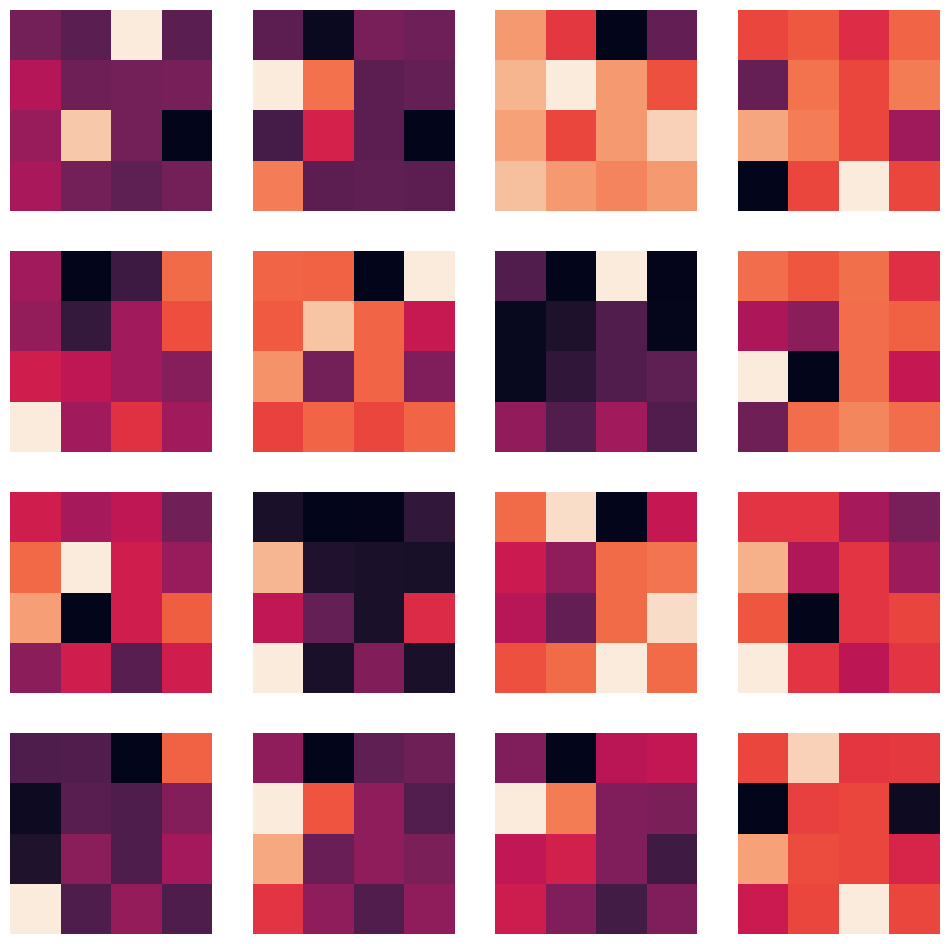

In [33]:
fig,axes = plt.subplots(4,4,figsize = (12,12))
for idx in range(16):           # 16 neurons in the 2nd Hidden layer
    res = []
    for i in range(16):         # for the weights coming from the 1st hidden layer
        inp = np.zeros(16)      # adjust for layer input size
        inp[i]=255
        res.append(np.matmul(inp,nn2.coefs_[1][:,idx])) # get the weight values
    sns.heatmap(pd.DataFrame(np.array(res).reshape(4,4)),ax=axes[idx//4,idx%4],cbar = False)
plt.setp(axes, xticks=[], yticks=[]);